In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from DataPreparation import * # includes visualizations, preprocessing, and tf-idf
from ModelCollection import *
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20202650\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv("../Data/birth_year.csv")
# data_ = DataPreparation(data, max_features=1000)
# data_.run()

In [3]:
import pickle
from Analysis import *
fileObj = open('analysis.obj', 'rb')
analysis_ = pickle.load(fileObj)
fileObj.close()
print(analysis_)

In [7]:
one, two = analysis_.modelCollection.overlapping_features(100)

[ 1.24064227e+01  4.49204121e-01 -4.09296723e+00  4.58022820e+00
  2.31685873e+01 -8.55969921e+00 -3.16531107e+00 -4.51627536e+00
 -2.49427222e+01 -2.53167745e+01  2.12738132e+01  5.75531980e+00
 -9.98988154e+00 -9.89428822e+00 -2.27190289e+00  4.78878334e-01
  2.87890296e+00  3.05685179e+00  1.03941349e+01 -1.32465752e+01
  1.27133969e+01 -2.17613678e+01 -5.86740986e-01 -5.98186414e+00
  6.56321998e+00 -1.29048950e+01  1.54072551e+01  2.32775151e+00
 -6.84598798e+00 -9.69640633e+00  5.62052129e+00  4.64564836e+00
 -4.60418914e+00  1.63787149e+01 -7.82023921e+00  1.42341564e+01
 -1.78107750e+01  1.72847852e+01 -1.99408095e+01  2.12677672e+00
 -1.38543294e+01 -5.45753546e+00  1.16463394e+01  8.25714550e+00
 -5.39359853e+00 -3.60360593e+00 -2.51765518e+01  1.27103532e+01
 -1.87476386e+01  5.25051076e+00 -6.90129603e+00 -1.57112388e+00
 -9.83413668e+00 -1.30155066e+01  4.10764092e+00 -1.15212764e+01
  2.94057279e+01  1.01338117e+01 -5.28794264e+00  1.56120522e+00
  7.59837902e+00 -4.69693

c:\Users\20202650\Documents\GitHub\LanguageAndAI\Analysis\ModelCollection.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  importances = pd.concat([importances, feature_importances])


In [6]:
two

,Heuristic,DecisionTreeRegressor,RandomForestRegressor,SVR,LinearRegression
Heuristic,NaN,"{not, public, problems, own, pretty, next, non...","{put, not, public, pretty, next, non, new, poo...","{possible, not, often, otherwise, public, pain...","{often, pain, or, pretty, non, poor}"
DecisionTreeRegressor,"{not, public, problems, own, pretty, next, non...",NaN,"{first, calling, not, public, needed, ill, pre...","{calling, not, public, ill, to, happened, next...","{calling, pretty, to, la, respect, away, high,..."
RandomForestRegressor,"{put, not, public, pretty, next, non, new, poo...","{first, calling, not, public, needed, ill, pre...",NaN,"{calling, sad, not, should, public, ill, to, h...","{calling, sad, should, pretty, to, away, high,..."
SVR,"{possible, not, often, otherwise, public, pain...","{calling, not, public, ill, to, happened, next...","{calling, sad, not, should, public, ill, to, h...",NaN,"{me, calling, sad, should, to, dogs, la, respe..."
LinearRegression,"{often, pain, or, pretty, non, poor}","{calling, pretty, to, la, respect, away, high,...","{calling, sad, should, pretty, to, away, high,...","{me, calling, sad, should, to, dogs, la, respe...",NaN


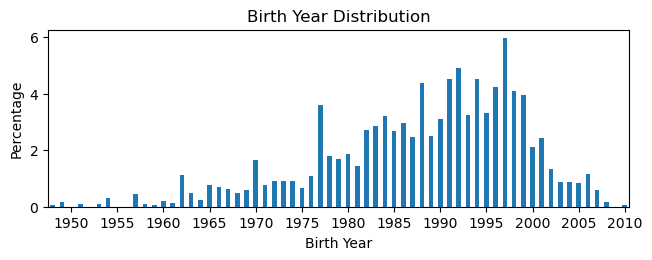

In [69]:
birth_year_frequency = (data['birth_year'].value_counts()) / len(data) * 100

for year in range(min(birth_year_frequency.index), max(birth_year_frequency.index) +1):
    if year not in birth_year_frequency.index:
        birth_year_frequency[year] = 0

birth_year_frequency.sort_index().plot(kind='bar', figsize=(7.5, 2.3))
plt.title('Birth Year Distribution')
plt.xlabel('Birth Year')
plt.ylabel('Percentage')
plt.xticks(range(2, 65, 5), range(1950, 2015, 5), rotation=0)
plt.show()

In [70]:
df = pd.read_csv('../Results/EvaluationMetrics.csv')
df

,Unnamed: 0,r2,mse,rmse,mae
0,Heuristic,-0.000011,118.484086,10.885040,8.714926
1,DecisionTreeRegressor,-0.394358,165.207451,12.853305,9.435122
2,RandomForestRegressor,0.306614,82.154265,9.063899,6.956504
3,SVR,0.327375,79.694542,8.927180,6.646003
4,LinearRegression,0.420070,68.711685,8.289251,6.427740
